# PyTorch Basics Notebook
### Introduction to Tensors, Datasets, DataLoaders, CNNs, and U‑Net Building Blocks

## Import Required Libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt


## PyTorch Tensors

In [3]:
# Creating tensors
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.randn(3)  # random tensor

print(x)
print(y)

# Tensor operations
print('Addition:', x + y)
print('Mean:', x.mean())


tensor([1., 2., 3.])
tensor([ 0.6252,  1.7997, -0.0756])
Addition: tensor([1.6252, 3.7997, 2.9244])
Mean: tensor(2.)


## Autograd Basics

In [4]:
# Enable gradient tracking
a = torch.tensor([2.0, 3.0], requires_grad=True)
b = (a * a).sum()
print(b)
b.backward()
print(a.grad)  # derivative of x^2 is 2x


tensor(13., grad_fn=<SumBackward0>)
tensor([4., 6.])


## Custom PyTorch Dataset

We simulate MRI-like slices using random arrays just for practice.

In [24]:
class RandomMRIDataset(Dataset):
    def __init__(self, length=100):
        self.length = length

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        image = torch.randn(1, 64, 64)      # fake MRI slice
        mask = (torch.randn(1, 64, 64) > 0).float()  # fake mask

        image = image.unsqueeze(0)
        mask = mask.unsqueeze(0)

        image = torch.nn.functional.interpolate(image, scale_factor=2)
        mask = torch.nn.functional.interpolate(mask, scale_factor=2)

        image = image.squeeze(0)
        mask = mask.squeeze(0)

        return image, mask

dataset = RandomMRIDataset()
img, msk = dataset[0]
img.shape, msk.shape


(torch.Size([1, 128, 128]), torch.Size([1, 128, 128]))

## DataLoader

In [6]:
loader = DataLoader(dataset, batch_size=8, shuffle=True)
print(type(loader))
for images, masks in loader:
    print(images.shape, masks.shape)
    break


<class 'torch.utils.data.dataloader.DataLoader'>
torch.Size([8, 1, 64, 64]) torch.Size([8, 1, 64, 64])


## Building a Simple CNN

In [26]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        return self.classifier(x)

model = SimpleCNN()
print(model)


SimpleCNN(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=1, bias=True)
    (2): Sigmoid()
  )
)


## Training Loop Example

In [8]:
model = SimpleCNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(2):
    for images, masks in loader:
        optimizer.zero_grad()
        preds = model(images)
        loss = criterion(preds, torch.zeros_like(preds))  # dummy target
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')


Epoch 1, Loss: 0.0000
Epoch 2, Loss: 0.0000


## U‑Net Building Blocks

In [9]:
def conv_block(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.ReLU()
    )

sample = torch.randn(1, 1, 128, 128)
block = conv_block(1, 16)
output = block(sample)
output.shape


torch.Size([1, 16, 128, 128])

## Exercises


1. Modify `RandomMRIDataset` to return a resized (128×128) slice using interpolation.  
2. Add another convolution layer to `SimpleCNN` and observe how the model size changes.  
3. Implement a small encoder-decoder network (mini U-Net) using `conv_block`.  
4. Write a custom Dice Loss function in PyTorch.  
5. Train the CNN on the random dataset and plot the loss curve using matplotlib.  


In [25]:
s = RandomMRIDataset()
print(s[0][0].shape)


torch.Size([1, 128, 128])


In [30]:
newCNN = SimpleCNN()
print(newCNN)
test = torch.randn(1, 1, 64, 64)
print(newCNN(test).shape)


SimpleCNN(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=1, bias=True)
    (2): Sigmoid()
  )
)
torch.Size([1, 1])


In [31]:
class MiniUNet(nn.Module):
    def __init__(self):
        super().__init__()
        #encoder part
        self.enc1 = conv_block(1, 16)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = conv_block(16, 32)
        self.pool2 = nn.MaxPool2d(2)
        
        self.bottleneck = conv_block(32, 64)
        
        #decoder part
        self.up2 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.dec2 = conv_block(64, 32)  
        self.up1 = nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2)
        self.dec1 = conv_block(32, 16) 
        
        self.out_conv = nn.Conv2d(16, 1, kernel_size=1)
    
    def forward(self, x):
        enc1_out = self.enc1(x)          
        x = self.pool1(enc1_out)        
        enc2_out = self.enc2(x)          
        x = self.pool2(enc2_out)        
        
        x = self.bottleneck(x)           
        
        x = self.up2(x)                  
        x = torch.cat([x, enc2_out], dim=1)  
        x = self.dec2(x)                 
        x = self.up1(x)                  
        x = torch.cat([x, enc1_out], dim=1)  
        x = self.dec1(x)                 
        
        x = self.out_conv(x)             
        return torch.sigmoid(x)

In [ ]:
def dice_loss(pred, target):
    predictions = pred.view(-1)
    targets = target.view(-1)
    intersection = (predictions * targets).sum()
    return 1 - (2 * intersection + 1e-6) / (predictions.sum() + targets.sum() + 1e-6)

In [ ]:

model = MiniUNet()
criterion = dice_loss
optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 10
epoch_losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, masks in loader:
        optimizer.zero_grad()
        preds = model(images)
        loss = criterion(preds, masks)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(loader)
    epoch_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')


Epoch 1/10, Loss: 0.4624
Epoch 2/10, Loss: 0.3334
Epoch 3/10, Loss: 0.3334
Epoch 4/10, Loss: 0.3332
Epoch 5/10, Loss: 0.3328
Epoch 6/10, Loss: 0.3329
Epoch 7/10, Loss: 0.3321
Epoch 8/10, Loss: 0.3334
Epoch 9/10, Loss: 0.3341
Epoch 10/10, Loss: 0.3333


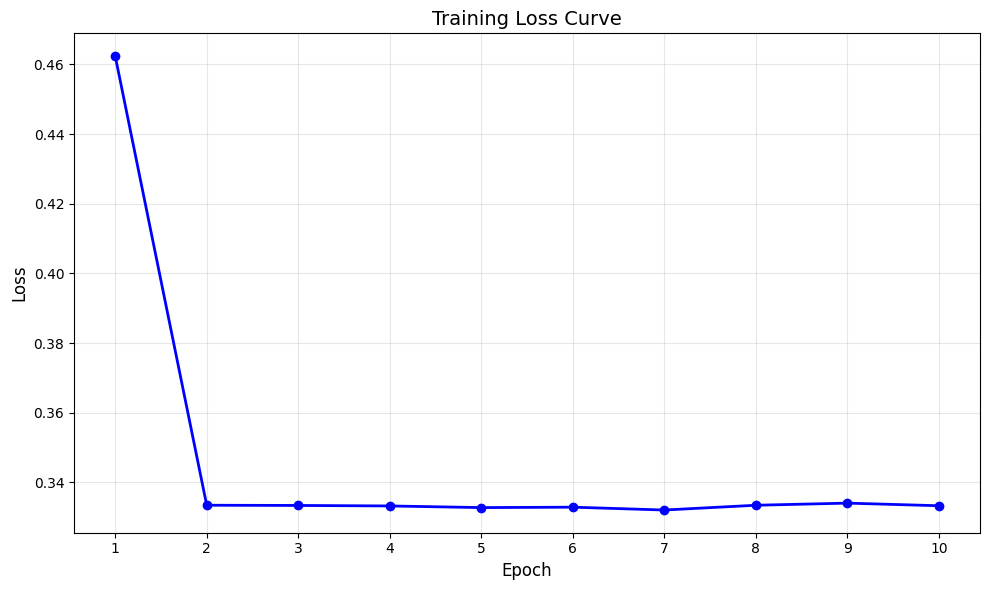

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), epoch_losses, 'b-', linewidth=2, marker='o')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Curve', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, num_epochs + 1))
plt.tight_layout()
plt.show()